In [1]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
# Define the path to your satellite images
image_dir = r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\image_test_data"

In [3]:
# Number of clusters for K-means
K = 6

In [4]:
# Create empty lists to store data
image_names = []
segment_areas = [[] for _ in range(K)]
all_pixels = np.empty((0, 3))

In [5]:
KMeans_model = KMeans(n_clusters=K)

In [6]:
for i in range(98):
    # Construct the image filename (assuming filenames like 'har_0.jpg', 'har_1.jpg', etc.)
    image_filename = os.path.join(image_dir, f'har_{i}.png')
    # Load the image using OpenCV
    image = cv2.imread(image_filename)

    if image is not None:
        # Flatten the image to create a 1D array (vector) of pixel values
        pixels = image.reshape(-1, 3)
        all_pixels = np.concatenate((all_pixels, pixels), axis=0)

#    if image is not None:
#        # Flatten the image to create a 1D array (vector) of pixel values
#        pixels = image.reshape(-1, 3)
#        if len(all_pixels) == 0:
#            all_pixels = pixels
#        else:
#            all_pixels = np.concatenate((all_pixels, pixels), axis=0)
KMeans_model.fit(all_pixels)

# Now you can use the fitted model to transform or predict clusters for each image
for i in range(98):
    # Load the image using OpenCV
    image_filename = os.path.join(image_dir, f'har_{i}.png')
    image = cv2.imread(image_filename)

    if image is not None:
        # Flatten the image to create a 1D array (vector) of pixel values
        pixels = image.reshape(-1, 3)

        # Get the cluster labels for each pixel in this image
        cluster_labels = KMeans_model.predict(pixels)

        # Calculate the relative area of each segment (if needed)
        total_pixels = len(cluster_labels)
        for cluster_id in range(K):
            segment_pixels = np.count_nonzero(cluster_labels == cluster_id)
            relative_area = segment_pixels / total_pixels
            segment_areas[cluster_id].append(relative_area)

        # Store the image name
        image_names.append(f'har_{i}')

c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
# Create a dictionary to store the results
result_dict = {
    "Image": image_names,
}
for cluster_id, areas in enumerate(segment_areas):
    result_dict[f"Segment_{cluster_id}"] = areas

In [8]:
# Create a pandas DataFrame
result_df = pd.DataFrame(result_dict)

In [9]:
result_df

,Image,Segment_0,Segment_1,Segment_2,Segment_3,Segment_4,Segment_5
0,har_0,0.297204,0.269335,0.012954,0.240513,0.022960,0.157034
1,har_1,0.178879,0.172184,0.023070,0.171327,0.350993,0.103547
2,har_2,0.261648,0.152437,0.021450,0.238305,0.234529,0.091630
3,har_3,0.075534,0.415236,0.003022,0.451570,0.000064,0.054574
4,har_4,0.218117,0.210705,0.061030,0.245719,0.110661,0.153768
...,...,...,...,...,...,...,...
93,har_93,0.166056,0.220950,0.085116,0.253216,0.078076,0.196586
94,har_94,0.213577,0.174041,0.090654,0.168559,0.134017,0.219152
95,har_95,0.191286,0.219698,0.003031,0.554900,0.000066,0.031018
96,har_96,0.215902,0.174526,0.028148,0.156135,0.195193,0.230096


In [10]:
indexes_to_display = [11,12,14,75]

In [11]:
import matplotlib.pyplot as plt

In [12]:
colors = [[255,0,0],[0,255,0],[0,0,255],[255,255,0],[128,0,128],[200,200,200]]
#colors = [[255,0,0],[0,255,0],[0,0,255],[255,255,0]]

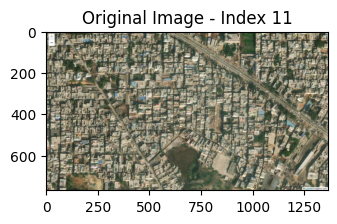

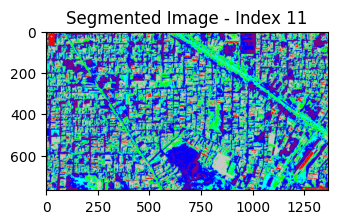

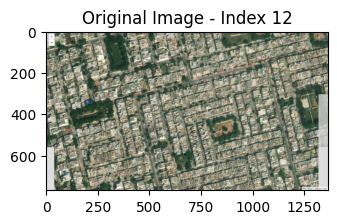

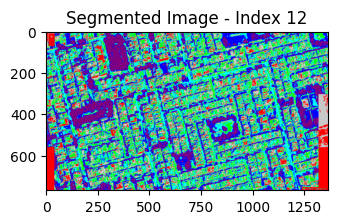

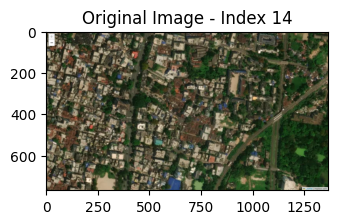

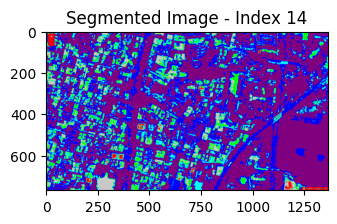

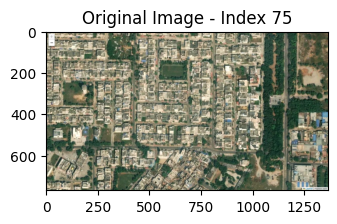

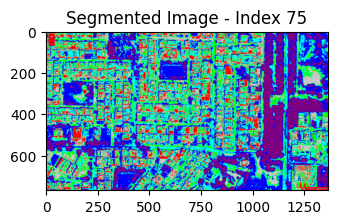

In [13]:
for index in indexes_to_display:
   image_filename = os.path.join(image_dir, f'har_{index}.png')
   image = cv2.imread(image_filename)
   plt.figure(figsize=(8, 4))
   plt.subplot(1, 2, 1)
   plt.title(f"Original Image - Index {index}")
   plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
   #plt.axis('off')
   plt.show()
   if image is not None:
      pixels = image.reshape(-1, 3)
      #kmeans = KMeans(n_clusters=K, random_state=0).fit(pixels)
      #cluster_labels = kmeans.labels_
      cluster_labels = KMeans_model.predict(pixels)
      cluster_labels = cluster_labels.reshape(image.shape[0], image.shape[1])
      #colors = np.random.randint(0, 256, (K, 3), dtype=np.uint8)
      colored_image = np.zeros_like(image)
      for category_id in range(K):
         colored_image[cluster_labels == category_id] = colors[category_id]

      plt.figure(figsize=(8, 4))
      plt.subplot(1, 2, 1)
      plt.title(f"Segmented Image - Index {index}")
      plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))
      #plt.axis('off')
      plt.show()
         
 


In [14]:
csv_file_path = r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\ICG\CDIS\K_Means Clusterring\k_6.csv"
result_df.to_csv(csv_file_path, index=False)